In [ ]:
import pandas as pd
import numpy as np
from pyod.models import dif
from pyod.models import deep_svdd
from pyod.models import lunar
import matplotlib.pyplot as plt

## Deep Models Multiple Views experiments
Adjust the dataset to study in the next cell

**CAUTION:** This experiment require ```pyod > 1.1.3```.

In [ ]:
name = "banana"

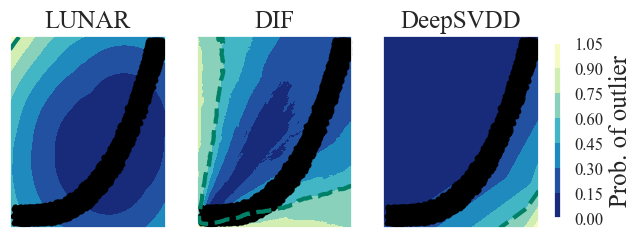

In [71]:
X = pd.read_csv(f"experiments/synthetic_data/{name}.csv", header=None)
X_full = pd.read_csv(f"experiments/synthetic_data/data_with_noise/{name}.csv", header=None)
X_norm = X

x_min, x_max = X.min()[0] - 0.05,  X.max()[0] + 0.05
y_min, y_max = X.min()[1] - 0.05, X.max()[1] + 0.05
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
output = [xx.ravel().tolist(),yy.ravel().tolist()]
for i in range(58):
    output.append((0*np.ones(len(output[0]))).tolist())
    #output.append(np.random.normal(0,1,len(output[0])).tolist())
output
train = pd.DataFrame(output).T
knn = dif.DIF()
knn.fit(X_full) 
Z_knn = knn.decision_function(train)
Z_knn = Z_knn.reshape(xx.shape)
Z_knn = (Z_knn-np.min(Z_knn))/(np.max(Z_knn)-np.min(Z_knn))
lof = lunar.LUNAR()
lof.fit(X_full)
Z_lof = lof.decision_function(train)
Z_lof = Z_lof.reshape(xx.shape)
Z_lof = (Z_lof-np.min(Z_lof))/(np.max(Z_lof)-np.min(Z_lof))

dsvdd = deep_svdd.DeepSVDD()
dsvdd.fit(X_full)
Z_dsvdd = dsvdd.decision_function(train)
Z_dsvdd = Z_dsvdd.reshape(xx.shape)
Z_dsvdd = (Z_dsvdd-np.min(Z_dsvdd))/(np.max(Z_dsvdd)-np.min(Z_dsvdd))
plt.rcParams['font.family'] = ['serif']
plt.rcParams['font.serif'] = ['Times New Roman']
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(7.5,2.5))
im = ax1.contourf(xx, yy, Z_lof, cmap="YlGnBu_r")
ax1.contour(xx,yy,Z_lof,levels=[0.9], linestyles = "dashed", cmap = "summer", linewidths=3)
ax1.scatter(X.iloc()[:, 0], X.iloc()[:, 1], s=10,color='black')
ax2.contourf(xx, yy, Z_knn, cmap="YlGnBu_r")
ax2.contour(xx,yy,Z_knn,levels=[0.6], linestyles = "dashed", cmap = "summer", linewidths=3)
ax2.scatter(X.iloc()[:, 0], X.iloc()[:, 1], s=10,color='black')
ax3.contourf(xx, yy, Z_dsvdd, cmap="YlGnBu_r")
ax3.contour(xx,yy,Z_dsvdd,levels=[0.6], linestyles = "dashed", cmap = "summer", linewidths=3)
ax3.scatter(X.iloc()[:, 0], X.iloc()[:, 1], s=10,color='black')

ax1.set_title("LUNAR", fontsize=18)
ax2.set_title("DIF", fontsize=18)
ax3.set_title("DeepSVDD", fontsize=18)

ax1.tick_params(axis='both', which = 'both', bottom = False, top = False, labelbottom = False, right = False, left = False, labelleft = False)
ax2.tick_params(axis='both', which = 'both', bottom = False, top = False, labelbottom = False, right = False, left = False, labelleft = False)
ax3.tick_params(axis='both', which = 'both', bottom = False, top = False, labelbottom = False, right = False, left = False, labelleft = False)

fig.subplots_adjust(right=0.83)
cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
cbar = fig.colorbar(im,cax = cbar_ax)
cbar.set_label(label = "Prob. of outlier",fontsize = 18)
cbar.ax.tick_params(axis='both', which = 'both', bottom = False, top = False, labelbottom = False, right = False, left = False, labelleft = False)
cbar.ax.tick_params(labelsize=12)
plt.savefig(f"experiments/heatmaps/{name}/deep_{name}_comparison.png",dpi=1200, bbox_inches='tight')
plt.show()